# EDA - Sale Prediction

the objective of this notebook is to understand the sales data using EDA and visualization

In [1]:
#Import Libraries used for data analysis and visualizion
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import logging

import dvc.api
import io 


sns.set_style("darkgrid")
%matplotlib inline

In [2]:
import sys
 
# adding scripts folder to the system path
sys.path.insert(0, '../scripts/')

In [3]:
import DataPipeline as dp

In [4]:
train_path="data/train_data.csv"
test_path="data/test_data.csv"

repo="C:/Users/user/Desktop/TenAcademy/Sales-Prediction-For-Pharmaceutical/"
train_ver="v1-train"
test_ver="v1-test"

train_str= dvc.api.read(
    path=train_path,
    repo=repo,
    rev=train_ver,
)

test_str= dvc.api.read(
    path=test_path,
    repo=repo,
    rev=test_ver,
)

   
train_data = pd.read_csv(io.StringIO(train_str), sep=",")
test_data = pd.read_csv(io.StringIO(test_str), sep=",")
print(train_data.columns)
print(test_data.columns)

Index(['Unnamed: 0', 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers',
       'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')
Index(['Unnamed: 0', 'Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [5]:
train_data.drop(columns=['Unnamed: 0'], inplace=True)
test_data.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
print ("Rows                : " ,train_data.shape[0])
print ("Columns             : " ,train_data.shape[1])
print ("\nFeatures          : \n" ,train_data.columns.tolist())
print ("\nMissing values    :  ", train_data.isnull().any())

Rows                :  1017209
Columns             :  18

Features          : 
 ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

Missing values    :   Store                        False
DayOfWeek                    False
Date                         False
Sales                        False
Customers                    False
Open                         False
Promo                        False
StateHoliday                 False
SchoolHoliday                False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2                       False
Promo2SinceWeek              False
Promo2SinceYear              False
PromoInterval              

In [7]:

print ("\nUnique values     : \n",train_data.nunique())


Unique values     : 
 Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     4
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            655
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 25
Promo2SinceYear                  8
PromoInterval                    4
dtype: int64


In [8]:
train_data.query('Store == 1')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,1,6,2013-01-05,4997,635,1,0,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
938,1,5,2013-01-04,4486,619,1,0,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
939,1,4,2013-01-03,4327,578,1,0,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
940,1,3,2013-01-02,5530,668,1,0,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [9]:
# Unique values
columns = list(train_data.columns)
columns.remove('Date')
columns.remove('CompetitionDistance')
for i in columns:
    print('Unique values in %s : %s' % (i, train_data[i].unique()))

Unique values in Store : [   1    2    3 ... 1113 1114 1115]
Unique values in DayOfWeek : [5 4 3 2 1 7 6]
Unique values in Sales : [ 5263  5020  4782 ... 20362 18841 21237]
Unique values in Customers : [ 555  546  523 ... 3727 4022 4106]
Unique values in Open : [1 0]
Unique values in Promo : [1 0]
Unique values in StateHoliday : ['0' 'a' 'b' 'c']
Unique values in SchoolHoliday : [1 0]
Unique values in StoreType : ['c' 'a' 'd' 'b']
Unique values in Assortment : ['a' 'c' 'b']
Unique values in CompetitionOpenSinceMonth : [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values in CompetitionOpenSinceYear : [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values in Promo2 : [0 1]
Unique values in Promo2SinceWeek : [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values in Promo2SinceYear : [   0. 2010. 2011. 2012. 2009. 2014.

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Customers'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

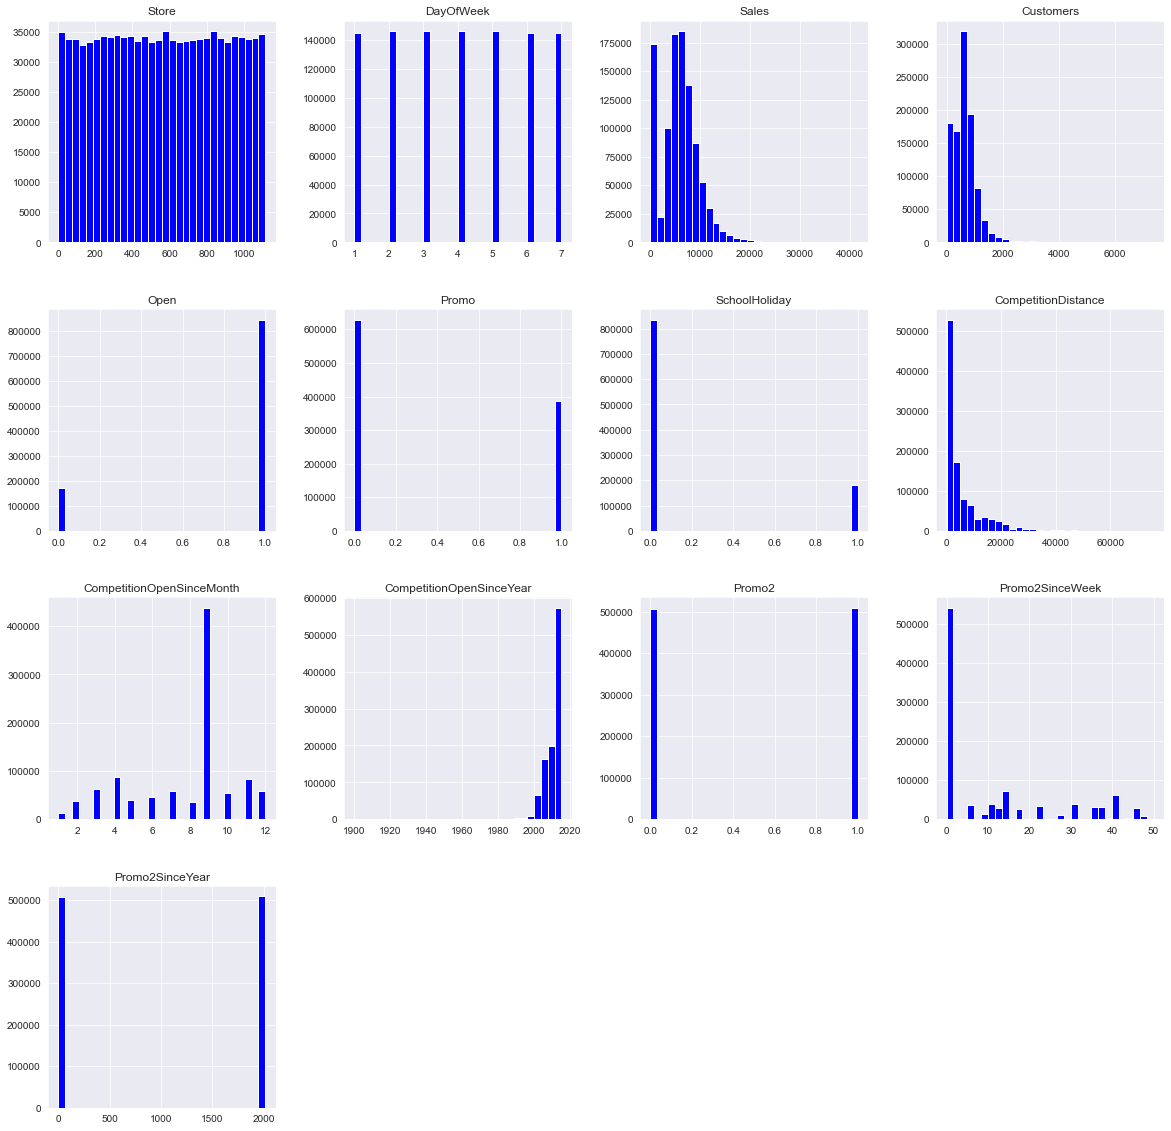

In [10]:
train_data.hist(bins = 30, figsize=(20, 20), color = 'b')

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>],
       [<AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>],
       [<AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>,
        <AxesSubplot:title={'center':'Promo2SinceYear'}>]], dtype=object)

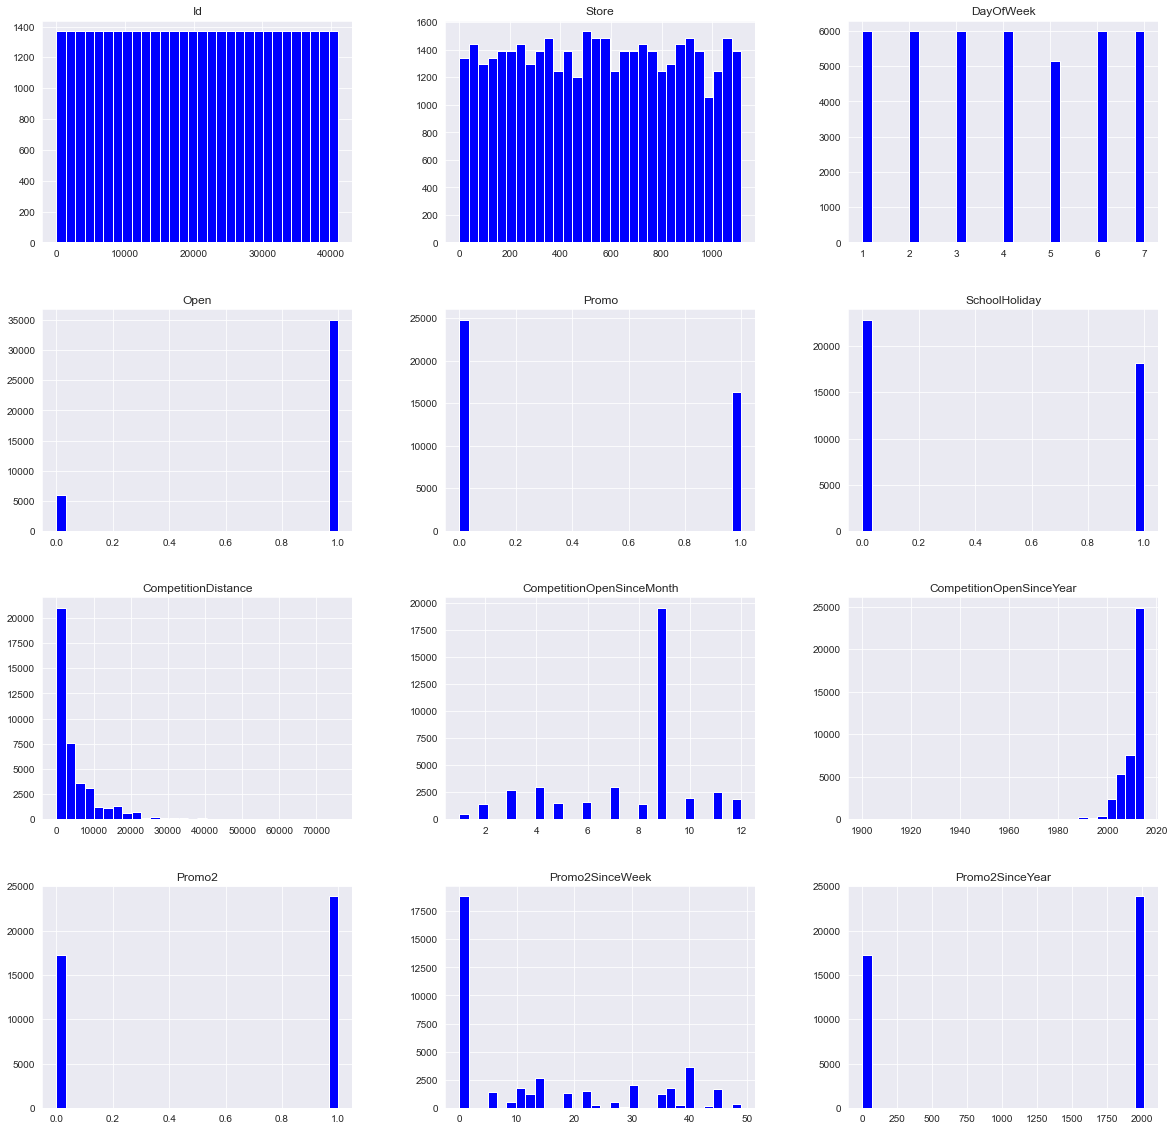

In [43]:
test_data.hist(bins = 30, figsize=(20, 20), color = 'b')

#### Data Pipline

In [11]:
pipe = dp.DataPipeline()

In [12]:
clean_train = pipe.pipeline(train_data)
clean_test = pipe.pipeline(test_data)

../scripts\DataPipeline.py:27: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data['WeekOfYear'] = pd.DatetimeIndex(data['Date']).weekofyear


In [13]:
clean_train.info()
clean_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int32  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int32  
 10  Assortment                 1017209 non-null  int32  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [14]:
clean_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,QuadYear,DayOfYear,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,3,...,0,0.0,0.0,0,2015,7,31,3,212,31
1,1,4,2015-07-30,5020,546,1,1,0,1,3,...,0,0.0,0.0,0,2015,7,30,3,211,31
2,1,3,2015-07-29,4782,523,1,1,0,1,3,...,0,0.0,0.0,0,2015,7,29,3,210,31
3,1,2,2015-07-28,5011,560,1,1,0,1,3,...,0,0.0,0.0,0,2015,7,28,3,209,31
4,1,1,2015-07-27,6102,612,1,1,0,1,3,...,0,0.0,0.0,0,2015,7,27,3,208,31


In [18]:
clean_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,QuadYear,DayOfYear,WeekOfYear,isPromo2
0,1,5,2015-07-31,5263,555,1,1,0,1,3,...,0.0,0.0,0,2015,7,31,3,212,31,0
1,1,4,2015-07-30,5020,546,1,1,0,1,3,...,0.0,0.0,0,2015,7,30,3,211,31,0
2,1,3,2015-07-29,4782,523,1,1,0,1,3,...,0.0,0.0,0,2015,7,29,3,210,31,0
3,1,2,2015-07-28,5011,560,1,1,0,1,3,...,0.0,0.0,0,2015,7,28,3,209,31,0
4,1,1,2015-07-27,6102,612,1,1,0,1,3,...,0.0,0.0,0,2015,7,27,3,208,31,0


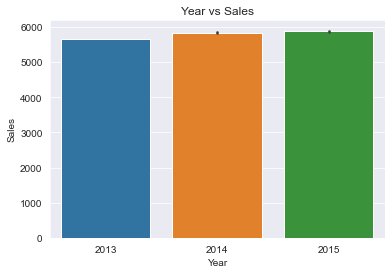

In [15]:
# Sales with respect to year 
sns.barplot(x='Year', y='Sales', data=clean_train).set(title='Year vs Sales')

plt.show()

#### - Observation
- the sale is increasing from year to year

[Text(0.5, 1.0, 'Month vs Sales')]

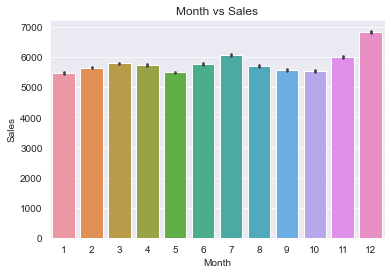

In [16]:
sns.barplot(x='Month',y='Sales', data=clean_train).set(title='Month vs Sales')

#### - Observation
- there are more number of sells in the end of a year (December)
- sales in july is also high

[Text(0.5, 1.0, 'Month vs Sales in 2015')]

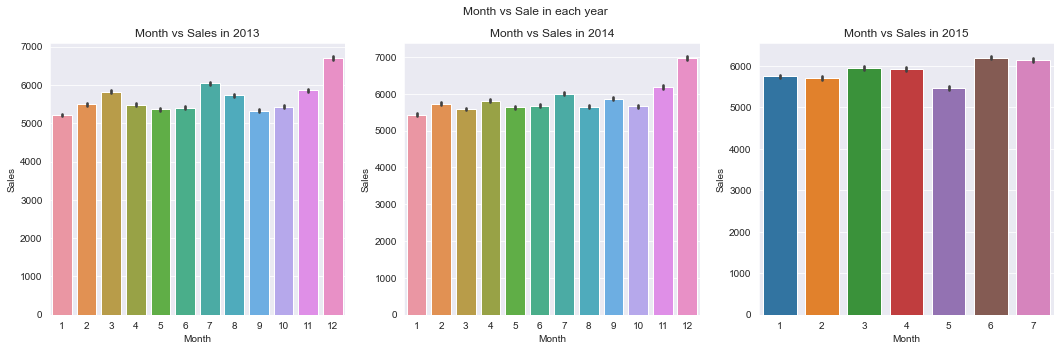

In [17]:
# plot month vs sale in each year

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
 
fig.suptitle('Month vs Sale in each year')

sns.barplot(ax=axes[0], x='Month',y='Sales', data=clean_train.query('Year == 2013')).set(title='Month vs Sales in 2013')
sns.barplot(ax=axes[1], x='Month',y='Sales', data=clean_train.query('Year == 2014')).set(title='Month vs Sales in 2014')
sns.barplot(ax=axes[2], x='Month',y='Sales', data=clean_train.query('Year == 2015')).set(title='Month vs Sales in 2015')


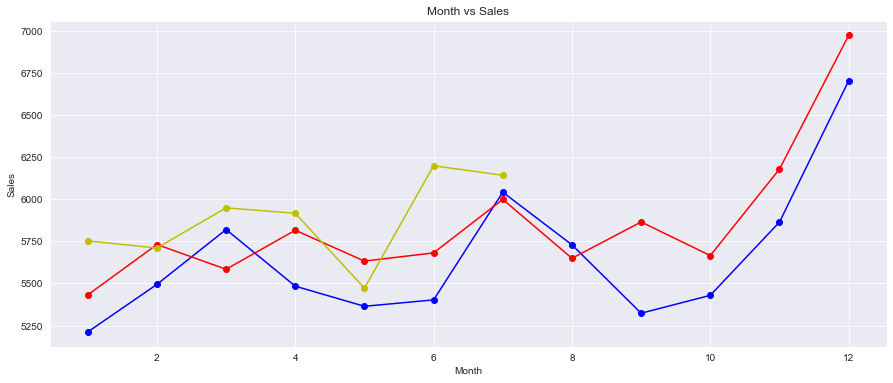

In [77]:
plt.figure(figsize=(15, 6))
plt.title('Month vs Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.plot(clean_train.query('Year == 2013').groupby('Month')[['Sales']].mean(), marker = 'o', color = 'b')
plt.plot(clean_train.query('Year == 2014').groupby('Month')[['Sales']].mean(), marker = 'o', color = 'r')
plt.plot(clean_train.query('Year == 2015').groupby('Month')[['Sales']].mean(), marker = 'o', color = 'y')

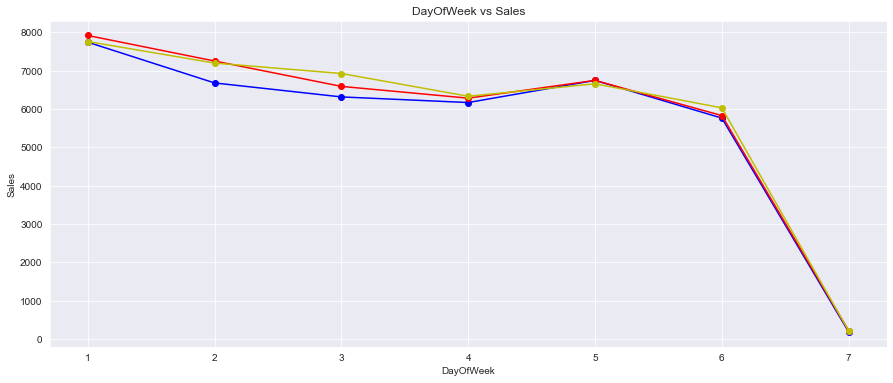

In [78]:
plt.figure(figsize=(15, 6))
plt.title('DayOfWeek vs Sales')
plt.xlabel('DayOfWeek')
plt.ylabel('Sales')
plt.plot(clean_train.query('Year == 2013').groupby('DayOfWeek')[['Sales']].mean(), marker = 'o', color = 'b')
plt.plot(clean_train.query('Year == 2014').groupby('DayOfWeek')[['Sales']].mean(), marker = 'o', color = 'r')
plt.plot(clean_train.query('Year == 2015').groupby('DayOfWeek')[['Sales']].mean(), marker = 'o', color = 'y')

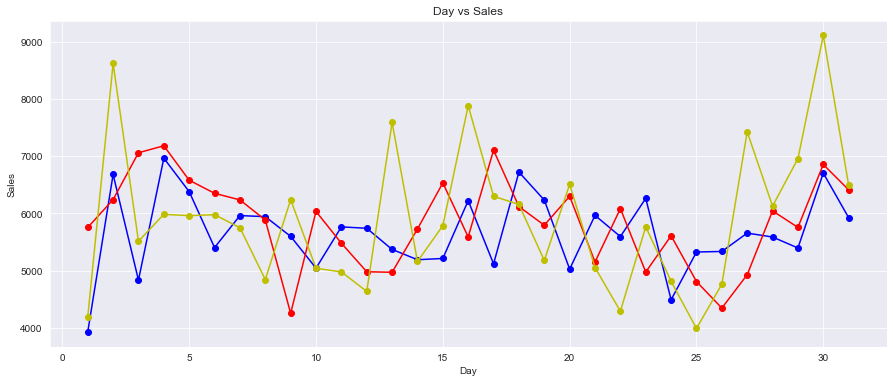

In [79]:
plt.figure(figsize=(15, 6))
plt.title('Day vs Sales')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.plot(clean_train.query('Year == 2013').groupby('Day')[['Sales']].mean(), marker = 'o', color = 'b')
plt.plot(clean_train.query('Year == 2014').groupby('Day')[['Sales']].mean(), marker = 'o', color = 'r')
plt.plot(clean_train.query('Year == 2015').groupby('Day')[['Sales']].mean(), marker = 'o', color = 'y')

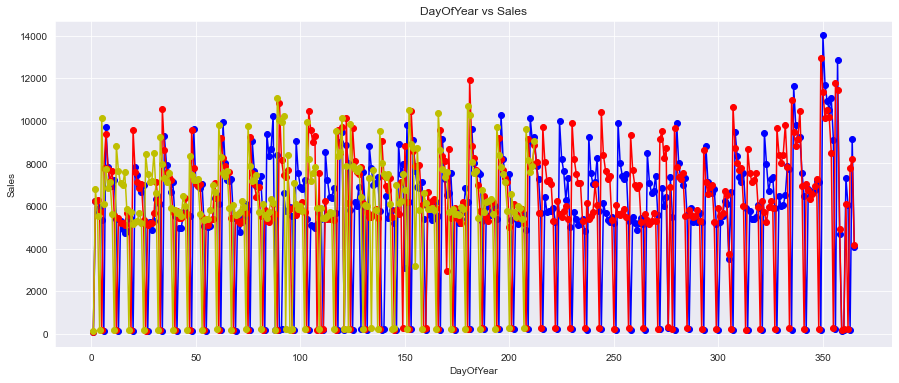

In [80]:
plt.figure(figsize=(15, 6))
plt.title('DayOfYear vs Sales')
plt.xlabel('DayOfYear')
plt.ylabel('Sales')
plt.plot(clean_train.query('Year == 2013').groupby('DayOfYear')[['Sales']].mean(), marker = 'o', color = 'b')
plt.plot(clean_train.query('Year == 2014').groupby('DayOfYear')[['Sales']].mean(), marker = 'o', color = 'r')
plt.plot(clean_train.query('Year == 2015').groupby('DayOfYear')[['Sales']].mean(), marker = 'o', color = 'y')

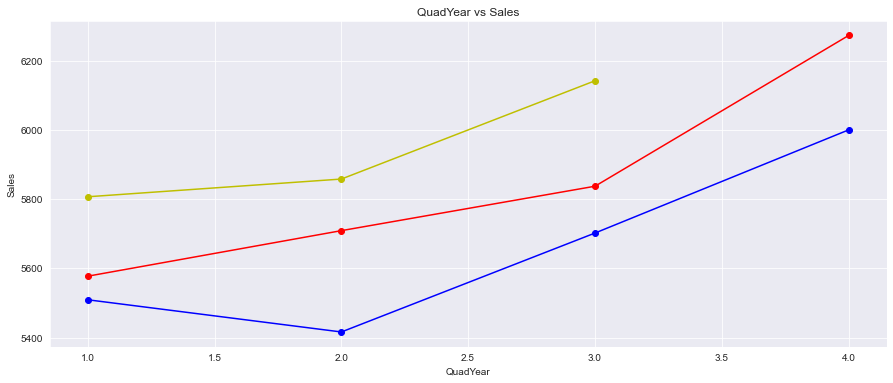

In [81]:
plt.figure(figsize=(15, 6))
plt.title('QuadYear vs Sales')
plt.xlabel('QuadYear')
plt.ylabel('Sales')
plt.plot(clean_train.query('Year == 2013').groupby('QuadYear')[['Sales']].mean(), marker = 'o', color = 'b')
plt.plot(clean_train.query('Year == 2014').groupby('QuadYear')[['Sales']].mean(), marker = 'o', color = 'r')
plt.plot(clean_train.query('Year == 2015').groupby('QuadYear')[['Sales']].mean(), marker = 'o', color = 'y')

#### - Observation
- both in 2013 and 2014, the sale are high at the end of a year
- and 2015 also following the same trend, since the year did not end yet

[Text(0.5, 1.0, 'Sales Vs Promo')]

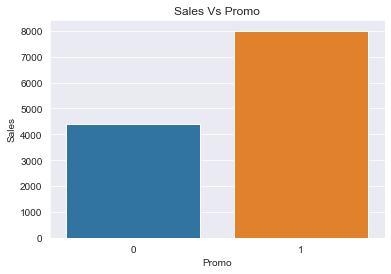

In [19]:
# Lets see how promo is impacting sales (Promo Vs Sale)
sns.barplot(x='Promo',y='Sales',data=clean_train).set(title='Sales Vs Promo')

[Text(0.5, 1.0, 'Promo2 vs Sales')]

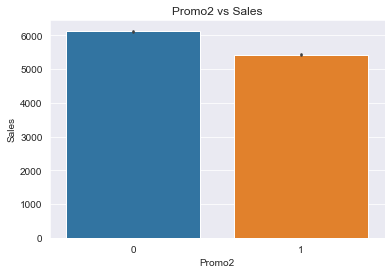

In [20]:
# Sales with respect to year 
sns.barplot(x='Promo2', y='Sales', data=clean_train).set(title='Promo2 vs Sales')

#### Observation

There are more number of Sales when there is a promo, so Customers are attracted by Promo

[Text(0.5, 1.0, 'Promo2 Vs Customers')]

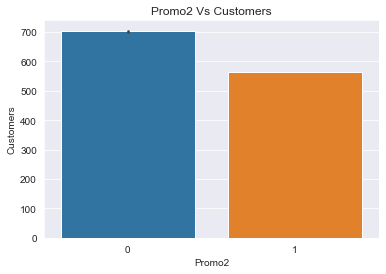

In [84]:
sns.barplot(x = 'Promo2', y = 'Customers', data=clean_train).set(title='Promo2 Vs Customers')

[Text(0.5, 1.0, 'Promo Vs Customers')]

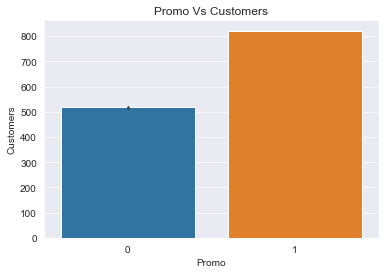

In [85]:
sns.barplot(x = 'Promo', y = 'Customers', data=clean_train).set(title='Promo Vs Customers')

Number of Opened Stores on Holidays are  156
0: No Holiday
1: Public Holiday
2: Easter Holiday
3: Chistmas Holiday


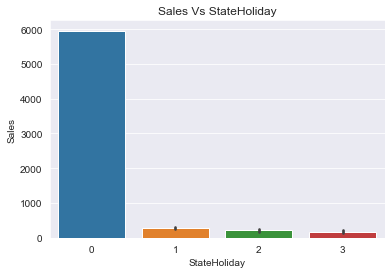

In [20]:
sns.barplot(x='StateHoliday', y='Sales', data=clean_train).set(title='Sales Vs StateHoliday')
num_of_opened_stores_on_holiday = clean_train[clean_train["StateHoliday"] != 0].query('Open == 1')['Store'].nunique()
print("Number of Opened Stores on Holidays are ", num_of_opened_stores_on_holiday)
print("0: No Holiday")
print("1: Public Holiday")
print("2: Easter Holiday")
print("3: Chistmas Holiday")

#### Observation

There a lot less Sales in Holidays (1, 2, and 3) since only 156 store have opened on Holidays

In [60]:
 easter = list(clean_train[clean_train['StateHoliday'] == 2].sort_values(['Store', 'Date'])['Date'])

['2013-03-29',
 '2013-04-01',
 '2014-04-18',
 '2014-04-21',
 '2015-04-03',
 '2015-04-06']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='StoreType', ylabel='Sales'>

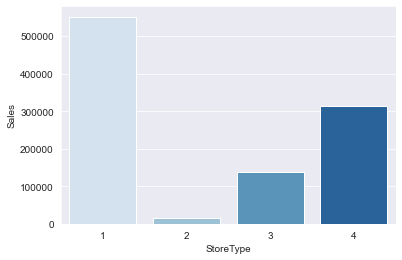

In [66]:
# Sales with respect to School Holiday
temp_df = clean_train.groupby(clean_train.StoreType).count()
sns.barplot(temp_df.index, temp_df['Sales'], palette='Blues')

# sns.barplot(x='StoreType', y='Sales', data=clean_train).set(title='StoreType vs Sales')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



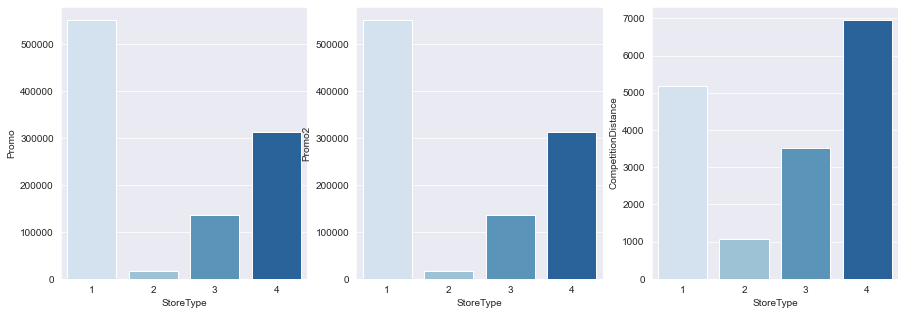

In [86]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
temp_df = clean_train.groupby(clean_train.StoreType).count()
sns.barplot(temp_df.index, temp_df['Promo'], ax=ax1, palette='Blues')

sns.barplot(temp_df.index, temp_df['Promo2'], ax=ax2, palette='Blues')
temp_df = clean_train.groupby(clean_train.StoreType).mean()
sns.barplot(temp_df.index, temp_df['CompetitionDistance'], ax=ax3, palette='Blues')
plt.show()

#### Observation

Store type 2 has more Sales than other Store Types, the other have about the same number of sales

1: Basic
2: Extra
3: Extended


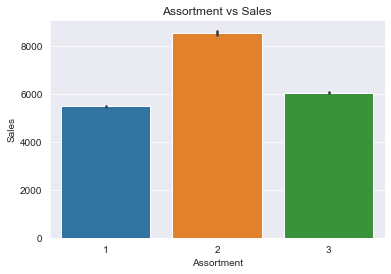

In [22]:
# Sales with respect to Assortment
sns.barplot(x='Assortment', y='Sales', data=clean_train).set(title='Assortment vs Sales')
print("1: Basic")
print("2: Extra")
print("3: Extended")

#### Observation

Store with Extra Assortment has more Sales than Basic and Extended

### Lets check if there is a day where the store is open and no holidays, and still there is no sale

In [25]:
no_sales = clean_train.loc[(clean_train['Sales']==0) & (clean_train['Open'] == 1) & (clean_train['StateHoliday'] == 0) 
                               & (clean_train['SchoolHoliday'] == 0)]
print(no_sales.shape)
no_sales.head()

(42, 23)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,QuadYear,DayOfYear
22589,25,4,2014-02-13,0,0,1,0,0,0,3,...,2003.0,0,0.0,0.0,0,2014,2,13,1,44
22590,25,3,2014-02-12,0,0,1,0,0,0,3,...,2003.0,0,0.0,0.0,0,2014,2,12,1,43
25212,28,4,2014-09-04,0,0,1,1,0,0,1,...,2014.0,1,6.0,2015.0,3,2014,9,4,3,247
51491,57,2,2014-07-01,0,0,1,1,0,0,4,...,2014.0,0,0.0,0.0,0,2014,7,1,3,182
92582,102,6,2014-07-12,0,0,1,0,0,0,1,...,2007.0,1,10.0,2014.0,3,2014,7,12,3,193


### Observation

This indicates that the sales data is not colected on that date, because if there is no holidays and the store is open there should be some sale
- 42 dates has no sale

so lets drop the 42 rows

In [26]:
# drop the 42 rows where there is no sale
clean_train.drop(
    clean_train.loc[(clean_train['Sales']==0) & 
                    (clean_train['Open'] == 1) & 
                    (clean_train['StateHoliday'] == 0) & 
                    (clean_train['SchoolHoliday'] == 0)].index, 
    inplace=True)

print(clean_train.shape)

(1017167, 23)


In [27]:
clean_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,QuadYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,3,...,2008.0,0,0.0,0.0,0,2015,7,31,3,212
1,1,4,2015-07-30,5020,546,1,1,0,1,3,...,2008.0,0,0.0,0.0,0,2015,7,30,3,211
2,1,3,2015-07-29,4782,523,1,1,0,1,3,...,2008.0,0,0.0,0.0,0,2015,7,29,3,210
3,1,2,2015-07-28,5011,560,1,1,0,1,3,...,2008.0,0,0.0,0.0,0,2015,7,28,3,209
4,1,1,2015-07-27,6102,612,1,1,0,1,3,...,2008.0,0,0.0,0.0,0,2015,7,27,3,208


<AxesSubplot:xlabel='Customers', ylabel='Sales'>

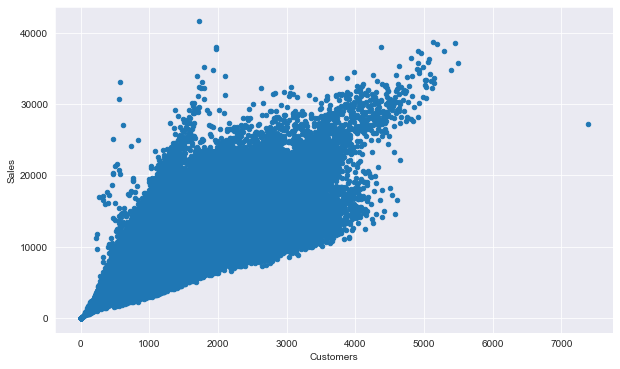

In [28]:
clean_train.plot(x='Customers',y='Sales',kind='scatter',figsize =(10,6))

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Sales'>

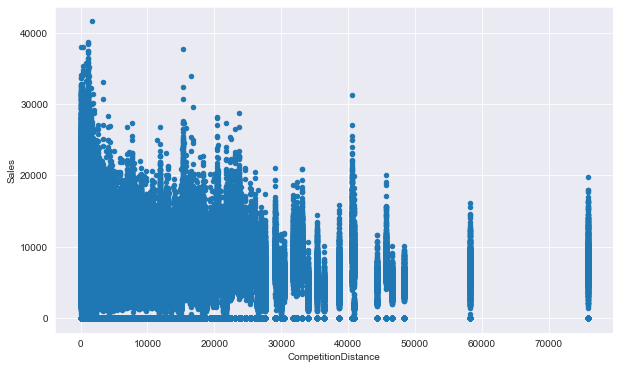

In [29]:
clean_train.plot(x='CompetitionDistance',y='Sales',kind='scatter',figsize =(10,6))

### Observation

The Stores Sale more When the compitition is closer

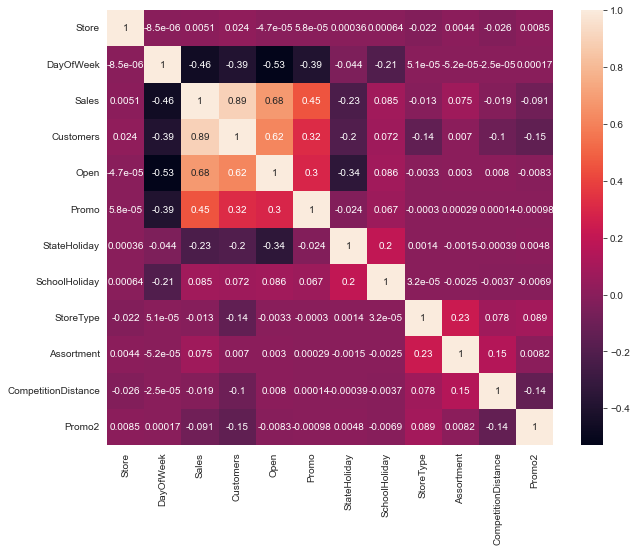

In [91]:
correlations = clean_train[['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',  'Promo2']].corr()
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlations, annot = True);

In [92]:
correlations = clean_train.corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.462125
StateHoliday                -0.229029
PromoInterval               -0.092635
Promo2SinceYear             -0.091056
Promo2                      -0.091040
Promo2SinceWeek             -0.044143
isPromo2                    -0.039279
CompetitionOpenSinceMonth   -0.023226
CompetitionDistance         -0.019289
StoreType                   -0.013057
Day                         -0.011612
Store                        0.005126
CompetitionOpenSinceYear     0.008740
Year                         0.023519
QuadYear                     0.043984
DayOfYear                    0.047503
Month                        0.048768
WeekOfYear                   0.052946
Assortment                   0.074941
SchoolHoliday                0.085124
Promo                        0.452345
Open                         0.678472
Customers                    0.894711
Sales                        1.000000
Name: Sales, dtype: float64

In [ ]:
# test_data.loc[np.isnan(test['Open']), 'Open'] = mode(test_data['Open'])